In [ ]:
from google.colab import drive
drive.mount('/content/google_drive')

Mounted at /content/google_drive


In [ ]:
!nvidia-smi

In [ ]:
!pip install -U "tensorflow>=2.5"


<div><div class="highlight-default notranslate"><div class="highlight"><pre><span></span>content/
├─ scripts/ (Google Drive Mount)
│  └─ preprocessing/
├─ models/
│  ├─ community/
│  ├─ official/
│  ├─ orbit/
│  ├─ research/
│  └─ ...
└─ workspace/ (Google Drive Mount)
    └─ training_demo/
</pre></div>


<div><div class="highlight-default notranslate"><div class="highlight"><pre><span></span>training_demo/
├─ annotations/
├─ exported-models/
├─ images/
│  ├─ test/
│  └─ train/
├─ models/
├─ pre-trained-models/
└─ README.md
</pre></div>

In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
# import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [ ]:
import re
from shutil import copyfile
import argparse
import math
import random

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3578, done.
remote: Counting objects: 100% (3578/3578), done.
remote: Compressing objects: 100% (2984/2984), done.
remote: Total 3578 (delta 938), reused 1499 (delta 540), pack-reused 0
Receiving objects: 100% (3578/3578), 47.07 MiB | 20.39 MiB/s, done.
Resolving deltas: 100% (938/938), done.


In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd /content/models/research/
protoc object_detection/protos/*.proto --python_out=.
cd /content
git clone https://github.com/cocodataset/cocoapi.git
cd /content/cocoapi/PythonAPI
make
cp -r pycocotools /content/models/research/
cd /content/models/research/
cp object_detection/packages/tf2/setup.py .
python -m pip install .
cd /content

In [ ]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

In [ ]:
# !mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v3"

In [ ]:
# !cp "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v2/pipeline.config" \
# "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v3"

In [ ]:
# !python /content/models/research/object_detection/model_main_tf2.py \
# --model_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v3" \
# --pipeline_config_path="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v3/pipeline.config" \
# --alsologtostderr

Keyboard : standardinput \
monitor  : standardoutput \
error    : standarderror

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2"

In [ ]:
# !mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v2"

In [ ]:
!ps 

In [ ]:
!kill 5931

In [ ]:
# !python /content/models/research/object_detection/model_main_tf2.py \
# --model_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2" \
# --pipeline_config_path="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2/pipeline.config" \
# --checkpoint_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2" \

In [ ]:
# %tensorboard --logdir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2"

In [ ]:
# !python /content/models/research/object_detection/exporter_main_v2.py \
# --input_type image_tensor \
# --pipeline_config_path "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2/pipeline.config" \
# --trained_checkpoint_dir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v2" \
# --output_directory "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v2"

In [ ]:
PATH_TO_MODEL_DIR = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v1"
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"
print(PATH_TO_SAVED_MODEL)

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v1/saved_model


In [ ]:
import time

In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [ ]:
print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 15.611130714416504 seconds


In [ ]:
PATH_TO_LABELS = '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:
TEST_IMAGE_PATH = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test/"

In [ ]:
IMAGE_PATHS = [TEST_IMAGE_PATH + f for f in os.listdir('/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test')
              if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg)$', f)] 

In [ ]:
print(IMAGE_PATHS)

In [ ]:
print(IMAGE_PATHS[0])

In [ ]:
IMAGE_PATHS_SELS = IMAGE_PATHS[800:805]

In [ ]:
IMAGE_PATHS_SELS = IMAGE_PATHS

In [ ]:
IMAGE_PATHS_SELS=["/content/41.jpg"]

In [ ]:
print(IMAGE_PATHS_SELS)

In [ ]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

Running inference for /content/41.jpg... Done


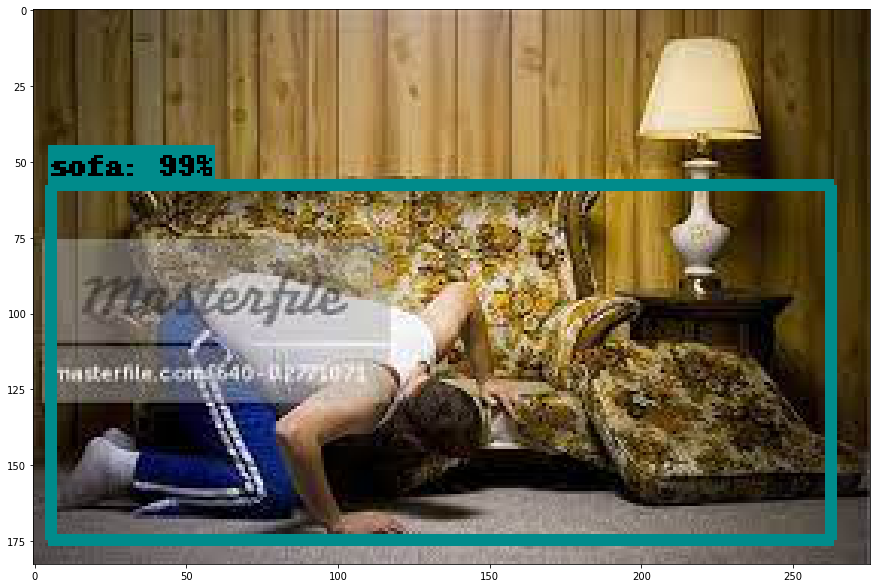

In [ ]:
for image_path in IMAGE_PATHS_SELS:

    print('Running inference for {}... '.format(image_path), end='')

    # image_path = TEST_IMAGE_PATH + image_path
    image_np = load_image_into_numpy_array(image_path)
    
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.90,
          agnostic_mode=False)

    plt.figure(figsize=(15,15))
    plt.imshow(image_np_with_detections)
    print('Done')

plt.show()
